In [1]:
import sys
sys.path.insert(0,'../src/')
from curve import *
from utils import *
import numpy as np
from multiply_connected_pipe import *
import pickle
from matplotlib import pyplot as plt

In [2]:
corner_size = 1

In [3]:
def merging2pipe(pipes):
    curves = []
    for pipe in pipes:
        curves += pipe.curves
    i = 0
    while i < len(curves):
        if not isinstance(curves[i], Cap):
            i += 1
            continue
        for j in range(i+1,len(curves)):
            if not isinstance(curves[j], Cap):
                continue
            if np.linalg.norm(curves[i].matching_pt - curves[j].matching_pt) < 1e-8:
                curves.pop(j)
                curves.pop(i)
                break
        i += 1
    curves = [c.clean_copy() for c in curves]
    return MultiplyConnectedPipeFromCurves(curves)

def transformed(pipe,shift):
    curves = [c.transformed(shift) for c in pipe.curves]
    return MultiplyConnectedPipeFromCurves(curves)

def plyg_bdr(pipe):
    pts = []
    for c in pipe.exterior_boundary.curves:
        pts += [c.start_pt]
        if isinstance(c, Corner):
            pts += [c.mid_pt]
    return np.array(pts + [pts[0]]).T


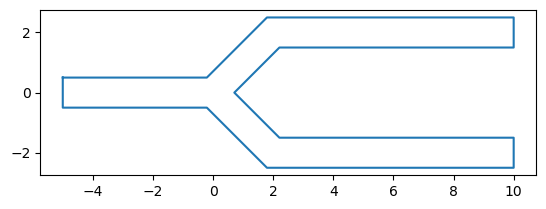

In [4]:
l1 = pt(-5,0)
l2 = pt(1,-1)
l3 = pt(1,1)
ls = np.array([l1,l2,l3])
rs = np.array([0.5,0.5,0.5])
pipe1 = NLets(ls,rs,corner_size=corner_size)
shift1 = np.array([0,0])

ls2 = np.array([pt(8,0),-l2])
rs2 = np.array([0.5,0.5])
pipe2 = NLets(ls2,rs2,corner_size=corner_size)
shift2 = 2*l2
pipe2 = transformed(pipe2,shift2)

ls3 = np.array([-l3,pt(8,0)])
rs3 = np.array([0.5,0.5])
pipe3 = NLets(ls3,rs3,corner_size=corner_size)
shift3 = 2*l3
pipe3 = transformed(pipe3,shift3)

pipe1 = merging2pipe([pipe1,pipe2,pipe3])

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.plot(*(plyg_bdr(pipe1)))

In [5]:
pipe4  = NLets(np.array([pt(-8,0), pt(1,1)]), np.array([0.5,0.5]),corner_size=corner_size)
pipe5  = NLets(np.array([pt(-8,0), pt(1,-1)]), np.array([0.5,0.5]),corner_size=corner_size)
pipe6 = NLets(np.array([[-1,-1],[5,0],[-1,1]]), np.array([0.5,0.5,0.5]),corner_size=corner_size)

shift4 = pt(-2,-2)
shift5 = pt(-2,2)
shift6 = pt(0,0)

pipe4 = transformed(pipe4,shift4)
pipe5 = transformed(pipe5,shift5)
pipe6 = transformed(pipe6,shift6)

pipe2 = merging2pipe([pipe4,pipe5,pipe6])

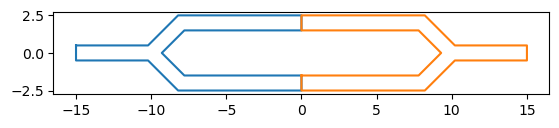

In [6]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
shift1 = pt(-10,0)
shift2 = pt(10,0)
plt.plot(*(plyg_bdr(pipe1)+shift1[:,np.newaxis]))
plt.plot(*(plyg_bdr(pipe2)+shift2[:,np.newaxis]))

In [7]:
pipe1 = transformed(pipe1,shift1)
pipe2 = transformed(pipe2,shift2)

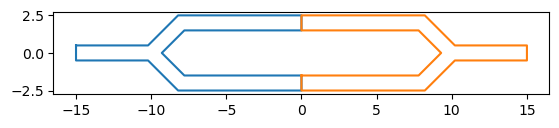

In [8]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.plot(*(plyg_bdr(pipe1)))
plt.plot(*(plyg_bdr(pipe2)))

In [9]:
pipes = [pipe1,pipe2]

In [10]:
with open('local_pipes.pickle','wb') as f:
    pickle.dump(pipes,f)

In [11]:
global_pipe = merging2pipe(pipes)

In [12]:
with open('global_pipe.pickle','wb') as f:
    pickle.dump(global_pipe,f)